# Sammenligning av teoretiske beregninger og praktiske målinger via rulling på bane

#### *M. K. Booth, L. Engø-Monsen, S. L. Kildahl, K. Skrede* ####

## Sammendrag ##

En måte å se på sammenhengen mellom teoretiske modeller og virkeligheten er ved å måle utføre et eksperiment i virkeligheten og så simulere det numerisk ved hjelp av teknologi. 
Bakgrunnen for gjennomføringen er å observere hvor sikkert vi kan simulere virkeligheten og verifisere newtons mekanikk som bevaring av energi.
Ved hjelp av høyhastighetsfilming ble en kule rullende ned en bane målt til å ha gjennomsnittshastighet $ (1.150 \pm 0.0115)m/s $ og en gjennomsnittlig kinetisk energi $ (0.287 \pm 9.65*10^{-8}) J. $ Samtidig viste simulasjonen av de numeriske metodene at gjennomsnittlig slutthastighet $1.263m/s $ og gjennomsnittlig kinetiskenergi er gitt til $ 0.0347J. $ Det var et et avvik fra den teoretiske modellen simulert og den numeriske modellen, det kan skyldes perspektivfeil eller feil ved den teoretiske modellen som neglisjering av friksjon. 


## Introduksjon ##

Moderne fysikk bygger på hypoteser som gjennom mange forsøk har blitt testet og utfordret før de har gått inn som teorier i dag. Disse teoriene har metoder for utregninger som gir analytiske svar som en modell på virkeligheten. Vi ønsker å se på newtons mekanikk og bevaring av energi for å kunne se på simulasjonen vår sammen med virkeligheten. Newtons mekanikk er det som blant annet omfatter bevegelse av materie, i dette tilfellet ballen, ved påvirkning av krefter (KILDE). I tillegg eksisterer det måter å tilnærme en løsning ved hjelp av numeriske metoder som gjetter seg til flere løsninger for definere en gjennomsnittlig løsning. I denne rapporten sammenligner vi derfor et analytisk med et numerisk svar for å vurdere om den analytiske metoden er en god nok modell av virkeligheten vi setter fra den numeriske løsningen av en kule som ruller ned en bane.


## Teori ##

 I en berg-og-dal-bane vil hastigheten og akselerasjonen variere på grunn av krumt underlag. Dersom baneformen y(x) er kjent, samt dens første- og andrederiverte, kan diverse størrelser til et kuleformet legeme som ruller langs banen bestemmes. Her er *y* høyden på banen (også kulens vertikale posisjon) som en funksjon av kulens horisontale posisjon *x*. Kulen har et treghetsmoment
    $$ I = c*m*R^2\tag{1}$$
der *R* er kulens radius, *m* er dens masse og vi antar uniform massefordeling slik at $c = 2/5$. 

Det antas at kulen ruller uten å gli, slik at total kinetisk energi K, er lik summen av translasjonsenergien $ E_t $ og rotasjonsenergien $ E_r $, slik at

   $$ E_t = {m*v^2\over 2}\tag{2}$$ 
   $$ E_r = {c*m*v^2\over 2}\tag{3} $$
   $$ K = E_t+ E_r = {(1+c)*m*v^2\over 2} \tag{4}$$

der *v* er kulens hastighet.
Når kulen starter med $v = 0 $ i høyde  $y(0) = y_0$ får vi total mekanisk energi $E = U + K = U$, der 
   $$U = m*g*y_0 \tag{5}$$
Ettersom vi kjenner til baneformen $y(x)$ kan vi bruke energibevaring for å finne farten $v$ som et uttrykk av $x:$

$$ v(x) = \sqrt{2g(y_0 - y(x)) \over (1+c)}\tag{6} $$
Banens krumning $\kappa$ er gitt ved, 
$$ \kappa = {y''\over [1+(y')^2]^{3/2}} \tag{7}$$
der $\kappa$ er positiv når banen krummer oppover (ser ut som et smilefjes 🙂) og negativ når banen krummer nedover (ser ut som et surfjes 🙁).     
 
Sentripetalakselerasjonen er gitt ved et uttrykk av farten som funksjon av horisontal posisjon $v(x)$, fra ligning $(6)$, og banens krumning $\kappa$, fra ligning $(7)$, slik at
$$a⊥ = v(x)^2 * \kappa \tag{8}$$
Fortegn for $a⊥$ vil gjelde tilsvarende for krumning, noe som gir en positiv y-komponent i vektoren **a⊥** og dermed vil høyden y ha positiv retning oppover.  

Videre betraktes Newtons 2. lov normalt på banen med fortegn valgt slik at normalkraften $N$, peker oppover og tyngdens komponent $G$, nedover, slik at 
$$G = m*g*cos(\beta)\tag{9}$$
$$N = m(g*cos(\beta) + a⊥) \tag{10}$$
der $\beta$ er banens helningsvinkel. 

Her antas det at både friksjon og luftmotstand er neglisjerbare over de relevante tids- og hastighetsintervallene. Alle målinger av fysiske størrelser er usikre, blant annet grunnet presisjonen til et måleinstrument og menneskelige feil. Dette kan kompenseres for ved å regne ut standardavvik til måleserien.   

Standardavviket *std* regnes ut ved å bruke numpy.std i Python slik at

$$ std = \sqrt{mean(x)} \ \ \ , \ \ \ x = |(a - a.mean())^2|  $$
$$ mean(x) = {x.sum()\over len(x)} $$

der *a* er en liste av målinger.


Dersom hastigheten $v_n$ og helningsvinkelen $\beta_n$ i et punkt $(x_n, y_n)$ er kjent, kan vi regne ut tiden $\Delta t_n$ kulen bruker fra $x_{n-1}$ til $x_n$. Hastighetens horisontale komponent $v_{x,n}$ i en gitt posisjon $x_n$, er gitt ved

$$v_{x,n} = v_ncos(\beta)$$
 noe som gir at tilnærmet gjennomsnittlig horisontal komponent av hastigheten $⟨v_x⟩$ på intervall nr $n$ er gitt ved
$$ ⟨v_x⟩_n = {1 \over 2} * (v_x,_{n -1} + v_x,_n) $$
ettersom $⟨v_x⟩_n = {\Delta x_n \over \Delta t_n}$ får vi
$$ \Delta t_n = {2 \Delta x_n\over v_{x,n-1} + v_{x,n}}$$

$$ t_n = \displaystyle\sum_{j=1}^{n} ∆t_j $$

I vårt tilfelle vil $\Delta x_n = x_n-x_{n-1} = 1mm$ ettersom banen er 1.4m lang, dette gir oss

$$ t_n = \displaystyle\sum_{j=1}^{n} ∆t_j \ \ \ \ ; \ \ \ \ n=0,1,2,...1400$$

## Metode ##
![alt text](tegning.png "Tegning av bane")


En kule med masse M = (0.031 +- 0.1)g og radius r = (0.011+- 0.1)m rulles ned på banen. Banen ble først generert ved å velge 8 tilfeldige y verdier og deretter beregnet ved en kubisk spline funksjon. *Figur 1* viser den genererte og simulerte banen. Den analytiske/teoretiske modellen og grafen vi bruker for å analysere dataene baserer seg på en antagelse og rulling uten forstyrrelser. 

Sluttfart er: 1.15 ± 0.00633 m/s
Slutt Kinetisk er: 20.5 ± 0.226 mJ


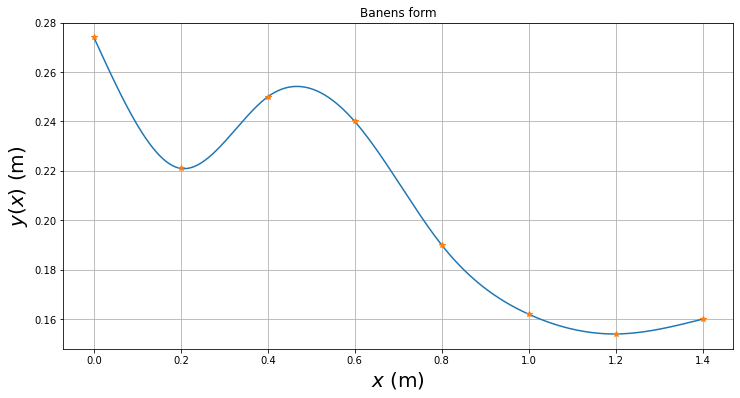

In [7]:
#Denne delen av koden er hentet fra CubicSpline notebooken som vi fikk utlevert.
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

#Konstanter

g = 9.81
# treghetsmomentet
c = 2/5
M = 0.031
R = 0.011
I = c*M*R**2

h = 0.200
xfast = np.asarray([0, h, 2*h, 3*h, 4*h, 5*h, 6*h, 7*h])

xmin = 0.000
xmax = 1.401
dx = 0.001

yfast = np.asarray([0.274, 0.221, 0.25, 0.24, 0.19, 0.162, 0.154, 0.16])
inttan = np.diff(yfast)/h

cs = CubicSpline(xfast, yfast, bc_type='natural')
xmin = 0.000
xmax = 1.401
dx = 0.001

x = np.arange(xmin, xmax, dx)

Nx = len(x)
y = cs(x)  # y=tabell med 1401 verdier for y(x)
dy = cs(x, 1)  # dy=tabell med 1401 verdier for y'(x)
d2y = cs(x, 2)  # d2y=tabell med 1401 verdier for y''(x)


sluttfart = [1.152,1.153,1.144,1.148,1.138,1.161,1.151,1.147,1.145,1.157]
sluttEK = []
average_velocity = np.mean(sluttfart)
standard_deviation = np.std(sluttfart)

for i in range(len(sluttfart)):
    sluttEK.append(0.5*M*sluttfart[i]**2)

average_kinetic_energy = np.mean(sluttEK)
standard_kinetic_energy_deviation = np.std(sluttEK)

print(f"Sluttfart er: {average_velocity:.2f} ± {standard_deviation:.5f} m/s")
print(f"Slutt Kinetisk er: {average_kinetic_energy*1000:.1f} ± {standard_kinetic_energy_deviation*1000:.3f} mJ")


baneform = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, y, xfast, yfast, '*')
plt.title('Banens form')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$y(x)$ (m)', fontsize=20)
plt.grid()
plt.show()

In [ ]:
#Her leser vi inn målt data

file = 'lab_data.txt'
f = open(file, 'r')
data_list = f.readlines()
time_data, x_data, y_data, v_data, ek_data = [],[],[],[],[]

for i in range(2,len(data_list)):
    data_list[i] = data_list[i].replace(',','.')
    data = data_list[i].strip('\n').split('\t')
    time_data.append(float(data[0]))
    x_data.append(float(data[1]))
    y_data.append(float(data[2]))
    v_data.append(float(data[3]))
    omega = float(data[3])/R
    e_kinetic = (1/2)*M*(float(data[3])**2)
    e_rotation = (1/2)*I*(omega**2)
    ek_data.append(e_kinetic+e_rotation)

In [ ]:
# fart
def v():
    return np.sqrt((2*g*(y[0]-y)/(1+c)))


In [ ]:
def betha():
    return np.arctan(dy)
    
def v_xn():
    return v()*np.cos(betha())

def average_v_xn(n):
    return 1/2 * (v_xn()[n]+v_xn()[n-1])

def delta_tn(n):
    return dx/average_v_xn(n)

def t():
    sum = 0
    result = []
    for i in range(Nx):
        sum += delta_tn(i)
        result.append(sum)
    return result


In [ ]:
def kinetic_energy():
    return 1/2 * M * v()**2 + 1/2 * I * (v()/R)**2

*Figur 1* - Graf av banens høyde som funksjon av horisontal posisjon.

<img src="bane.png" alt="drawing" height="500" class="center"/>

*Forsøksoppsettet*

Bildet over viser forsøksoppsettet. Forsøket ble filmet med mobilkamera plasser 1.2 meter unna banen, og analysert ved hjelp av softwaren «Tracker». Tracker anvender en kvadratisk regresjonstilpasning på de målte datapunktene fra videoen og gir ut et estimat for fart, posisjon og tid.
Forsøket ble gjentatt 10 ganger og usikkerheten i forsøket ble estimert ved å beregne en differanse mellom de ulike målte verdiene.



## Resultater ##
Banestart og -slutt ble målt hhv høydene $ (27.5 \pm 0.5)cm $ og $ (17.5 \pm 0.5)cm, $  og horisontal start- og sluttposisjon $ (0.00 \pm 0.5)cm $ og (1.4 \pm 0.5)cm $ (se tabell 1), der usikkerheten er anslag basert på avlesningnøyaktigheten. Vi har også tidsutviklingen y(t) ved de ulike posisjonene.


|x(t)| y(x) |y(t)|
|----------------|----------------|----------------|
|0.0  ± 0.005m|0.275  ± 0.005m  |legg inn verdier|
|0.2  ± 0.005m|0.221 ± 0.005m   |*|
|0.4  ± 0.005m|0.250 ± 0.005m   |*|
|0.6  ± 0.005m|0.240 ± 0.005m   |*|
|0.8  ± 0.005m|0.190 ± 0.005m   |*|
|1.0  ± 0.005m|0.162 ± 0.005m   |*|
|1.2  ± 0.005m|0.154 ± 0.005m   |*|          
|1.4  ± 0.005m|0.160 ± 0.005m   |*|

*Tabell 1*


Det ble tatt 10 målinger av kulens slutthastighet i banen. Gjennomsnittet av og standardfeilen i disse verdiene gir en gjennomsnittlig slutthastighet på $ (1.1496 \pm 0.0115) m/s $ som gir gjennomsnittlig kinetisk energi $(0.287 \pm 9.65*10^{-8}) J. $  hvor usikkerheten er beregnet ved differansen mellom høyeste og laveste målte hastighet. 

Et datasett fra eksperimentet er vist i figur 2 sammen med den numeriske løsningen av farten til kulen nedover banen. Datasettet gir oss farten og da en simulasjon og modell av virkeligheten *figur 3* som viser den analytiske og den numeriske kinetiske energien. Ettersom den er avhengig av farten ser vi en lik grad av ulikhet mellom disse grafene som med farten.

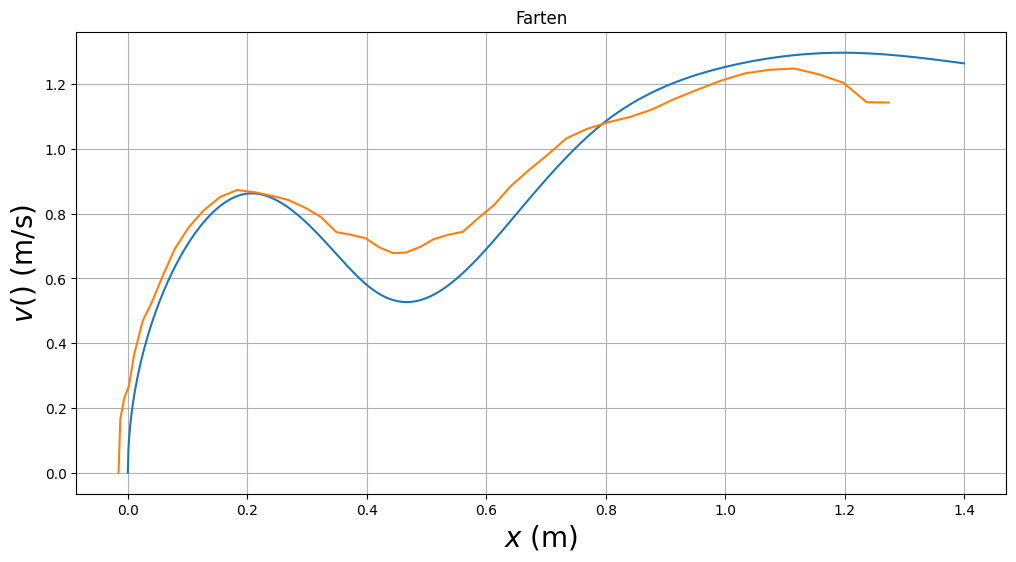

In [29]:
fart = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, v())
plt.plot(x_data,v_data)
plt.title('Farten')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v()$ (m/s)', fontsize=20)
plt.grid()
plt.show()

*Figur 2* - Graf over målt og simulert fart til kulen

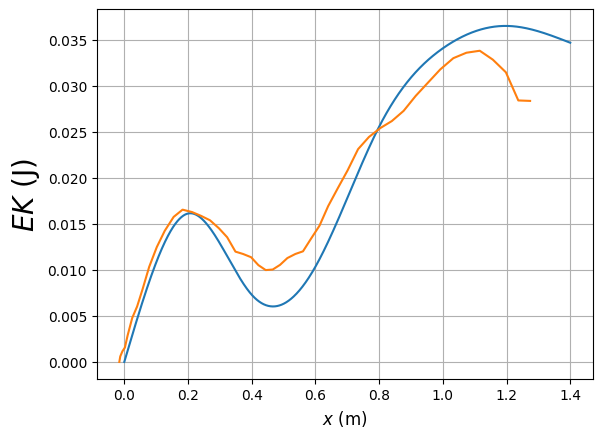

In [30]:
plt.plot(x, kinetic_energy())
plt.plot(x_data, ek_data)
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$EK$ (J)', fontsize=20)
plt.grid()
plt.show()

*Figur 3* - Graf over målt og simulert kinetisk energi 

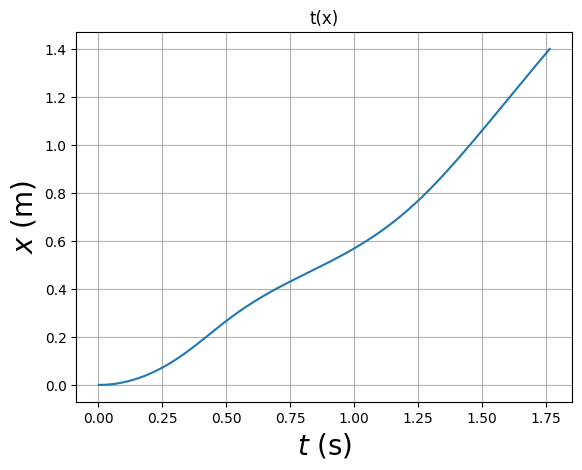

In [33]:
plt.plot(t(), x)
plt.title('t(x)')
plt.ylabel('$x$ (m)', fontsize=20)
plt.xlabel('$t$ (s)', fontsize=20)
plt.grid()
plt.show()

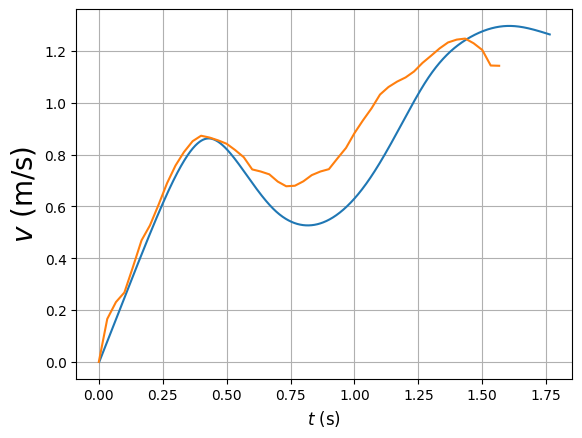

In [34]:
plt.plot(t(), v())
plt.plot(time_data,v_data)
plt.xlabel('$t$ (s)', fontsize=12)
plt.ylabel('$v$ (m/s)', fontsize=20)
plt.grid()
plt.show()

## Diskusjon ##
Vi måler farten til kulen på banen basert på dens *x*- og *y*-posisjon. Disse avstandene er målt med en sikkerhet som er begrenset av nøyaktigheten i avlesningen av meterstokken. Denne feilen har vi antatt vil ligge ved størrelsesorden $ \pm 0.05cm. $ 
Det er også andre feilkilder som kan ha spilt inn. Dette er spesielt perspektivfeil. Et eksempel på dette var avstanden mellom banen og kameraet som ble målt til 1.2 m. Dette kan gi perspektivfeil dersom dybden eller avstanden var målt feil. For eksempel, dersom avstanden hadde vært 1.25m ville vi fått perspektivfeil på $ (1.0m/1.2m) * 1.25m -1.0m ≈ 0.04m $ i posisjonsmålingene til Tracker. Dette kan forklare avviket vi får på målingene av farten. 

Til slutt er det noen mulige feilkilder knyttet til forenklinger i den teoretiske modellen som beskriver systemet og eksperimentet vårt. Blant annet neglisjerer vi luftmotstand og friksjon, og antar en rett, direkte bane for kulen. Det er rimelig å anta at ballen ruller uten å gli da kulen er laget av et materiale som er glatt og har en relativt liten radius. I realiteten av eksperimentet vil faktorene som friksjon og luftmotstand spille inn. Vi observerte blant annet at ballen ikke alltid rullet rett ned på banen, men kunne dunke mot “veggene” i sporet. Dette førte i så fall til mer friksjon og overføring av energi i dunkene, noe som kan gi en lavere fart på avlesningen. 

## Konklusjon ##
Vi målte fart og kinetisk energi av en kule som rullet ned en bane både med numerisk og analytisk løsning. Bakgrunnen for dette er å sammenligne hvor godt vi kan simulere virkeligheten og newtons mekanikk. Resultatet viste noe ulike verdier for de to mulige løsningene. Vi ser at gjennomsnittlig slutthastighet $ (1.150 \pm 0.0115)m/s $ og en gjennomsnittlig kinetisk energi $ (0.287 \pm 9.65*10^{-8}) J. $ for virkeligheten, men i simulasjonen fikk vi gjennomsnittlig slutthastighet $1.263m/s $ og gjennomsnittlig kinetisk energi er gitt til $ 0.0347J. $ Grunner til disse avvikene kan skyldes menneskelige avlesningsfeil, perspektivfeil og neglisjering av luftmotstand, friksjon og andre usikkerheter i en rullende kule.

## Referanser ##
Støvneng, J. A. (2021, Januar 31). *Ren rulling på krumt underlag – energibevarelse.* Hentet fra TFY41xx Fysikk: Labprosjekt Vår 2021: https://home.phys.ntnu.no/brukdef/undervisning/fyslab/files/labligninger.pdf

*Legg inn referanse for kilden som skal være i introduksjon om Newton mekanikk*
